# Unit 5 - Financial Planning


In [32]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [33]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [34]:
# Set monthly household income
# YOUR CODE HERE!
monthly_household_income = 12000.00

### Collect Crypto Prices Using the `requests` Library

In [35]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [36]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [37]:
# Fetch current BTC price
# YOUR CODE HERE!

'''change to json format'''
btc_url=btc_url + "?format=json"

btc_response_data=requests.get(btc_url)

import json

'''convert to json data'''
btc_data=btc_response_data.json()
'''test print json data to iterate to btc price value. commented out for brevity'''
# print(json.dumps(btc_data, indent=4))

'''assign btc value to variable'''
btc_price=btc_data['data']['1']['quotes']['USD']['price']
# print(btc_price)

# Fetch current ETH price
# YOUR CODE HERE!]
eth_url=eth_url+"?format=json"
eth_response_data=requests.get(eth_url)

'''convert to json data'''
eth_data=eth_response_data.json()
'''test print json data to iterate to eth price value.'''
# print(json.dumps(eth_data, indent=4))

eth_price=eth_data['data']['1027']['quotes']['USD']['price']
# print(eth_price)

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13641.77
The current value of your 5.3 ETH is $2029.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [38]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [39]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

'''test keys'''
# print(f"Alpaca Key: {type(alpaca_api_key)}")
# print(f"Alpaca Secret Key: {type(alpaca_secret_key)}")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


In [40]:
# Format current date as ISO format
# YOUR CODE HERE!
today=pd.Timestamp('2020-08-19', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio=alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

'''Remove System Time/Trade Close time from index'''
df_portfolio.index=df_portfolio.index.date
df_portfolio
    
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=float(df_portfolio['AGG']['close'])
spy_close_price=float(df_portfolio['SPY']['close'])

# # Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.37
Current SPY closing price: $337.22


In [41]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16861.00
The current value of your 200 AGG shares is $23674.00


### Savings Health Analysis

In [42]:
# Create savings DataFrame
# YOUR CODE HERE!
df_savings=pd.DataFrame()
savings_crypto={
    'Amount':[my_btc,my_eth],
}

df_savings=pd.DataFrame(savings_crypto)
# # df_savings=df_savings.set_index(['BTC','ETH'])
# df_savings.rename(index={0: "BTC", 1: "ETH"})
# df_savings.rename({0: "BTC", 1:"ETH"}, axis='index')

# Display savings DataFrame
display(df_savings)

,Amount
0,1.2
1,5.3


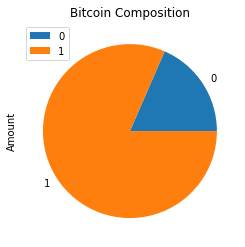

In [43]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='Amount', title="Bitcoin Composition")

In [44]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=my_btc_value+my_eth_value+my_agg_value + my_spy_value
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f' Congratulations! Your total savings of ${total_savings} exceeds your goal!')
elif total_savings == emergency_fund:
    print (f' Congratulations! Your total savings of ${total_savings} meets your goal!')
else:
    print(f' You still need ${(emergency_fund-total_savings)} to reach your goal!')

 Congratulations! Your total savings of $56206.138 exceeds your goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [47]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
'''Using code learned in class'''
end_date=pd.Timestamp.now(tz='America/New_York')
start_date=(end_date-pd.DateOffset(years=5)).isoformat()

# start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
# end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [50]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data=alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.index=df_stock_data.index.date
df_stock_data.head()

AGG                                        SPY           \
              open     high     low    close   volume    open     high   
2015-08-25  109.70  109.700  109.13  109.450  3843124  195.43  195.450   
2015-08-26  109.08  109.410  108.88  108.950  3673170  192.08  194.790   
2015-08-27  108.95  109.195  108.93  109.100  3454665  197.02  199.410   
2015-08-28  109.34  109.370  108.93  109.001  4604866  198.50  199.835   
2015-08-31  109.28  109.370  108.90  108.920  3866305  198.11  199.125   

                                       
               low   close     volume  
2015-08-25  187.06  187.24  270267060  
2015-08-26  188.37  194.56  255843495  
2015-08-27  195.21  199.28  226847229  
2015-08-28  197.92  199.28  111959716  
2015-08-31  197.01  197.60  108023599

In [52]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

In [55]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_dist.portfolio_data.head()

AGG                                                     SPY  \
              open     high     low    close   volume daily_return    open   
2015-08-25  109.70  109.700  109.13  109.450  3843124          NaN  195.43   
2015-08-26  109.08  109.410  108.88  108.950  3673170    -0.004568  192.08   
2015-08-27  108.95  109.195  108.93  109.100  3454665     0.001377  197.02   
2015-08-28  109.34  109.370  108.93  109.001  4604866    -0.000907  198.50   
2015-08-31  109.28  109.370  108.90  108.920  3866305    -0.000743  198.11   

                                                             
               high     low   close     volume daily_return  
2015-08-25  195.450  187.06  187.24  270267060          NaN  
2015-08-26  194.790  188.37  194.56  255843495     0.039094  
2015-08-27  199.410  195.21  199.28  226847229     0.024260  
2015-08-28  199.835  197.92  199.28  111959716     0.000000  
2015-08-31  199.125  197.01  197.60  108023599    -0.008430

In [56]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995789,0.981259,0.998334,0.997306,1.003293,1.005540,1.007059,0.996923,1.002877,1.010913,...,0.994206,1.004253,0.991604,1.004060,1.003999,1.004296,1.002936,0.985723,1.011740,1.002133
2,1.006758,0.992048,1.011070,0.987083,1.000298,1.005900,1.012841,1.002844,1.006108,1.012059,...,1.004123,1.006688,0.992864,1.012723,1.011209,0.999481,0.993000,0.980948,1.010526,1.009373
3,0.991961,0.999090,1.019504,0.992619,1.007631,1.011425,1.019343,0.991163,1.000057,1.023476,...,1.014094,0.997145,0.997356,1.005380,1.019139,1.012025,0.991309,0.990287,1.017175,0.993967
4,1.001344,0.990608,1.025305,0.997413,1.003000,1.005873,1.024874,0.993446,0.980135,1.016440,...,1.007236,1.019353,1.003878,1.004025,1.018164,1.013907,0.981132,0.991636,1.022155,0.985595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.073680,13.113428,7.989692,5.543933,21.703589,14.166927,12.711545,17.008277,13.801421,26.882710,...,12.104453,20.878882,10.616887,6.715806,36.381309,9.574008,20.861401,5.722680,6.421080,13.750792
7557,7.023617,13.182249,8.133361,5.572672,21.575746,14.167311,12.700718,17.009661,13.562679,26.852969,...,12.153211,20.888568,10.538753,6.655975,36.395480,9.434592,20.937476,5.790506,6.396066,13.660733
7558,7.088123,13.231740,8.114539,5.649253,21.665225,14.088750,12.778419,16.905884,13.601717,26.728833,...,12.238206,20.881046,10.514093,6.608714,36.449254,9.496554,21.021914,5.846612,6.470868,13.760726
7559,7.167971,13.153093,8.074886,5.695401,21.744276,14.041558,12.633786,17.084828,13.652330,26.788622,...,12.172717,21.248658,10.623813,6.615816,36.465443,9.545428,21.179459,5.843046,6.463380,13.664910


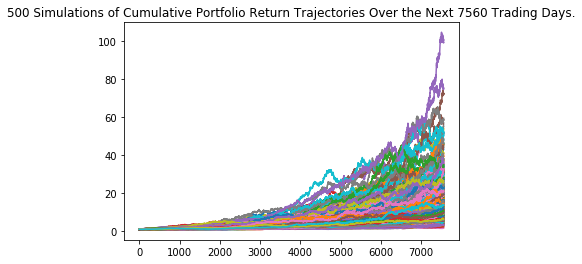

In [57]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_dist_lines_plot=mc_dist.plot_simulation()

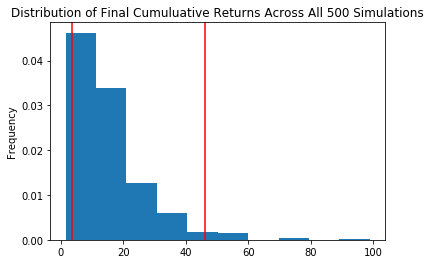

In [60]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot= mc_dist.plot_distribution()

### Retirement Analysis

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl=mc_dist.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean             15.678033
std              11.472028
min               1.552989
25%               8.004206
50%              12.441365
75%              20.040481
max              98.920430
95% CI Lower      3.592005
95% CI Upper     46.256741
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [64]:
# Set initial investment
initial_investment = 20000

ci_upper=round(even_tbl[9]*initial_investment,2)
ci_lower=round(even_tbl[8]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71840.09 and $925134.83


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [68]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_upper_increased=round(even_tbl[9]*initial_investment,2)
ci_lower_increased=round(even_tbl[8]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_increased} and ${ci_upper_increased}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $107760.14 and $1387702.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_five)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")